

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1
#### Angel Joseph Vargas Martinez


# Introducción
Para la realizacion de este trabajo se necesito trabajar con 4 temas teoricos:

### Teorema del muestreo
El teorema establece la frecuencia de muestreo, para que una secuencia discreta de muestras capture toda la informacion de una señal continua en el tiempo, tiene que ser mayor al doble de la frecuencia maxima de la señal.
$$
f_s > 2F_{max}
$$
Si se llega muestrear mas lento, es decir:$$f_s < 2F_{max}$$
Se pierde informacion
La cantidad de muestreas que necesarias a tomar va a depender de cuanto tiempo se quiera obser la señal
$$
N = T . f_s
$$
En este trabajo se opto por usar una frecuencia($f_s $)igual a 400000 Hz y la cantidad de muestras ($N$) igual a 800

### Ortogonalidad de Señales
Dos señales discretas son ortogonales si su producto interno es nulo:
$$
\sum_{n=0}^{N-1} x[n] \, y[n] = 0
$$

### Autocorrelacion
Es la correlacion de una señal consigo misma:
$$
r_{xx}[k] = \sum_{n} x[n] \, x[n+k]
$$

### Correlacion Cruzada
Es la correlacion de dos señales distintas:
$$
r_{xy}[k] = \sum_{n} x[n] \, y[n+k]
$$
# Análisis y desarrollo

En esta parte del codigp defino las librerias y las funciones que voy a utilizar
Siendo sen la funcion de una senoidal, modu la señal modulada, cuad la señal y pulso rectangular, y cos la señal del coseno

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def sen(vmax, dc, ff, ph, nn, fs):
    
    n = np.arange(0,nn)
    tt = n/fs
    w0 = 2 * np.pi * ff
    xx = dc + vmax * np.sin(w0 * tt + ph)
    
    return tt, xx

def modu(vmax, dc, ff, ph, nn, fs):
    
    n = np.arange(0,nn)
    tt = n/fs
    w0 = 2 * np.pi * ff
    xx = (dc + vmax * np.sin(w0 * tt + ph))*(dc + vmax * np.sin((w0/2) * tt +ph))
    
    return tt, xx

from scipy import signal
def cuad(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000, duty=0.5):
    tt = np.arange(0,nn)/fs
    xx = dc + (vmax *signal.square(2 * np.pi * ff * tt + ph, duty=duty))

    
    return tt, xx

def cos(vmax, dc, ff, ph, nn, fs):
    
    n = np.arange(0,nn)
    tt = n/fs
    w0 = 2 * np.pi * ff
    xx = dc + vmax * np.cos(w0*tt+ph)
    
    return tt, xx

En esta parte del codigo se resuelve lo que pide la consigna:
**Sintetizar y graficar:**

Una señal sinusoidal de 2KHz.
Misma señal amplificada y desfazada en π/2.
Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
Señal anterior recortada al 75% de su amplitud.
Una señal cuadrada de 4KHz.
Un pulso rectangular de 10ms.
En cada caso indique tiempo entre muestras, número de muestras y potencia o energía según corresponda.

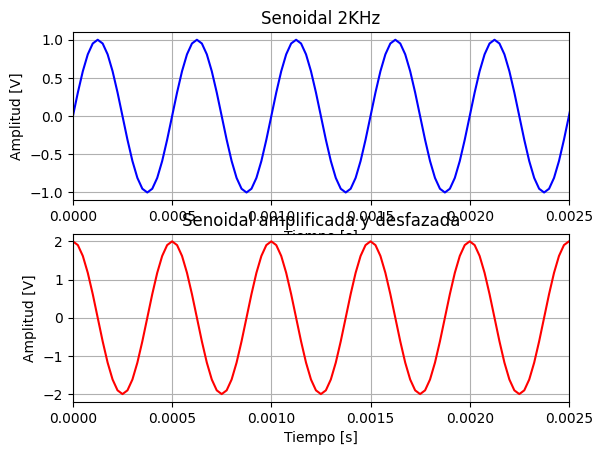

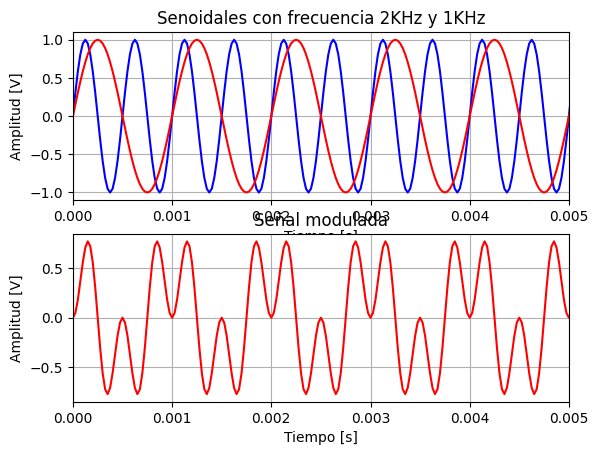

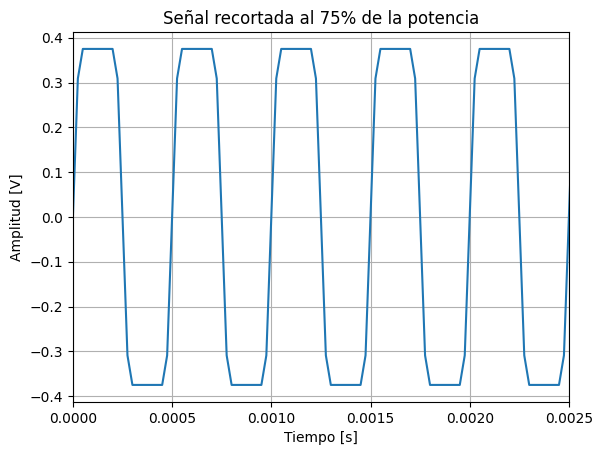

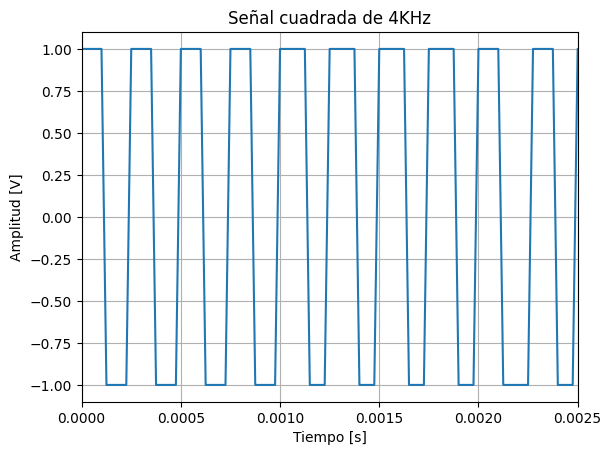

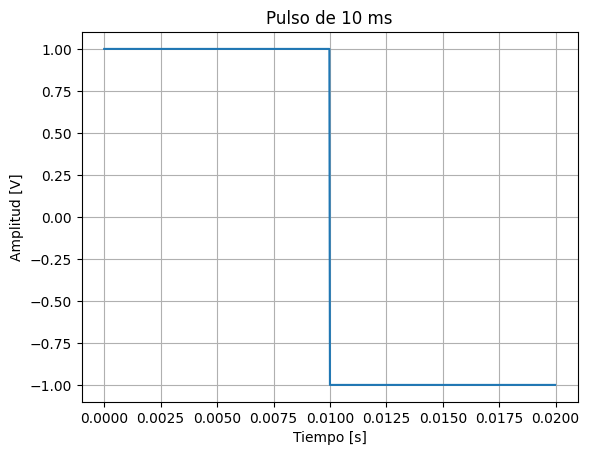

In [3]:
N =800
fs1 = 40000
vmax1=1
dc1=0
f1=2000
ph1=0
t1,x1 = sen(vmax=vmax1,dc=dc1,ff=f1,ph=ph1,nn=N,fs=fs1)

vmax2=2
dc2=0
f2=f1
ph2= np.pi / 2
t2,x2 = sen(vmax=vmax2,dc=dc2,ff=f2,ph=ph2,nn=N,fs=fs1)

fig, axs = plt.subplots(2, 1)
axs[0].plot(t1, x1, color='blue')
axs[0].set_title('Senoidal 2KHz')
axs[0].set_xlabel('Tiempo [s]')
axs[0].set_ylabel('Amplitud [V]')
axs[0].set_xlim(0, 0.0025)
axs[0].grid(True)

axs[1].plot(t2, x2, color='red')
axs[1].set_title('Senoidal amplificada y desfazada')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [V]')
axs[1].set_xlim(0, 0.0025)
axs[1].grid(True)

ta,xa = sen(vmax=vmax1,dc=dc1,ff=f1/2,ph=ph1,nn=N,fs=fs1)
t3,x3 = modu(vmax=vmax1,dc=dc1,ff=f1,ph=ph1,nn=N,fs=fs1)

fig, ax = plt.subplots(2, 1)
ax[0].plot(t1, x1, color='blue')
ax[0].plot(ta,xa,color='red')
ax[0].set_title('Senoidales con frecuencia 2KHz y 1KHz')
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Amplitud [V]')
ax[0].set_xlim(0, 0.005)
ax[0].grid(True)

# Plot on the second subplot
ax[1].plot(t3, x3, color='red')
ax[1].set_title('Señal modulada')
ax[1].set_xlabel('Tiempo [s]')
ax[1].set_ylabel('Amplitud [V]')
ax[1].set_xlim(0, 0.0050)
ax[1].grid(True)

threshold= 0.75 * (vmax1**2)/2
x4 = np.clip(x1,-threshold,threshold)
plt.figure(6)
plt.plot(t1,x4)
plt.title('Señal recortada al 75% de la potencia')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0,0.0025)
plt.grid(True)
plt.show()

t5,x5 = cuad(vmax=vmax1,dc=dc1,ff=4000,ph=ph1,nn=N,fs=fs1,duty=0.5)
plt.figure(7)
plt.plot(t5,x5)
plt.title('Señal cuadrada de 4KHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0,0.0025)
plt.grid(True)
plt.show()


t6,x6=cuad(vmax=vmax1,dc=dc1,ff=50,ph=ph1,nn=N,fs=fs1,duty=0.5)
plt.plot(t6,x6)
plt.title('Pulso de 10 ms')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)
plt.show()

In [ ]:
En esta parte se verifica la ortogonalidad entre la primera señal y las demás

In [4]:
a1=0.0
a2=0.0
a3=0.0
a4=0.0
a5=0.0
for d in range(N-1):
        a1 += x1[d]*x2[d]
        a2 += x1[d]*x3[d]
        a3 += x1[d]*x4[d]
        a4 += x1[d]*x5[d]
        a5 += x1[d]*x6[d]
    
if a1==0:
    print ('La señal sinusoidal de 2KHz es ortogonal con la señal amplificada y desfazada en π/2.')
else:
    print ('La señal sinusoidal de 2KHz no es ortogonal con la señal amplificada y desfazada en π/2.')
if a2==0:
    print ('La señal sinusoidal de 2KHz es ortogonal con la señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.')
else:
    print ('La señal sinusoidal de 2KHz no es ortogonal con la señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.')

if a3==0:
    print ('La señal sinusoidal de 2KHz es ortogonal con la señal recortada al 75% de su amplitu.')
else:
    print ('La señal sinusoidal de 2KHz no es ortogonal con la señal recortada al 75% de su amplitu.')
if a4==0:
    print ('La señal sinusoidal de 2KHz es ortogonal con la señal cuadrada de 4KHz.')
else:
    print ('La señal sinusoidal de 2KHz no es ortogonal con la señal cuadrada de 4KHz.')
if a5==0:
    print ('La señal sinusoidal de 2KHz es ortogonal con el pulso rectangular de 10ms.')
else:
    print ('La señal sinusoidal de 2KHz no es ortogonal con el pulso rectangular de 10ms.')

La señal sinusoidal de 2KHz no es ortogonal con la señal amplificada y desfazada en π/2.
La señal sinusoidal de 2KHz no es ortogonal con la señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
La señal sinusoidal de 2KHz no es ortogonal con la señal recortada al 75% de su amplitu.
La señal sinusoidal de 2KHz no es ortogonal con la señal cuadrada de 4KHz.
La señal sinusoidal de 2KHz no es ortogonal con el pulso rectangular de 10ms.


In [ ]:
En esta otra parte se grafica la autocorrelación de la primera señal y la correlación entre ésta y las demás

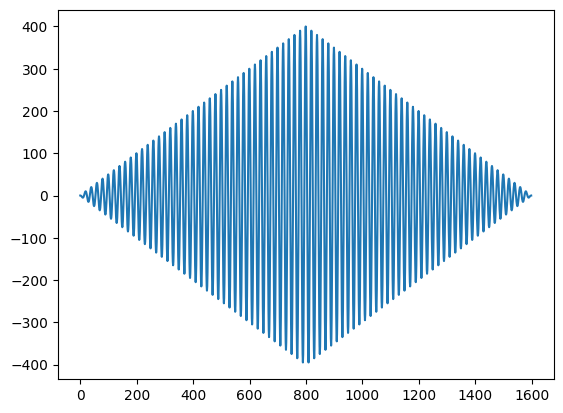

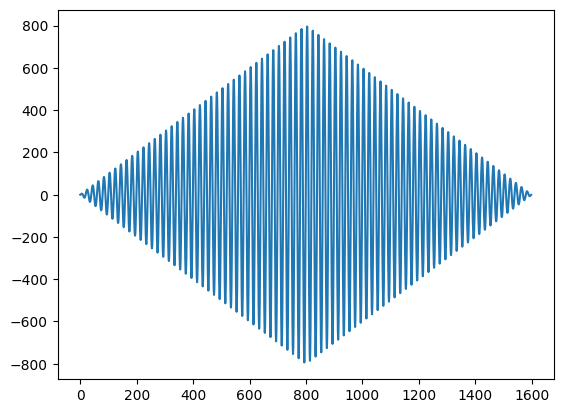

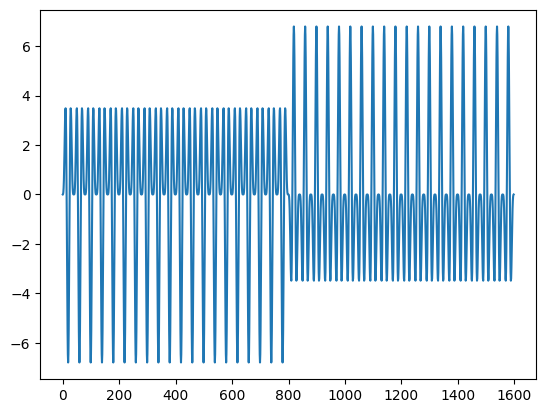

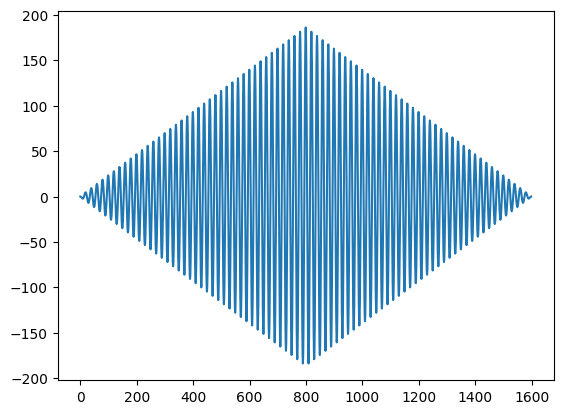

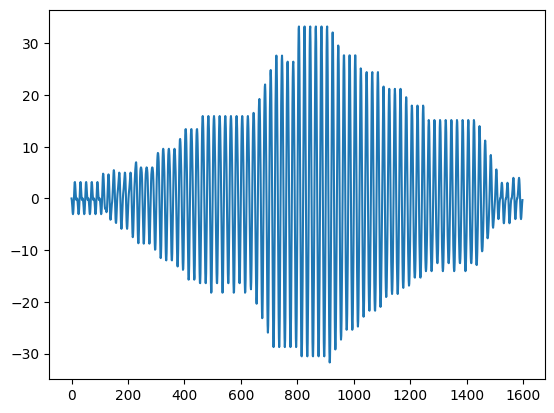

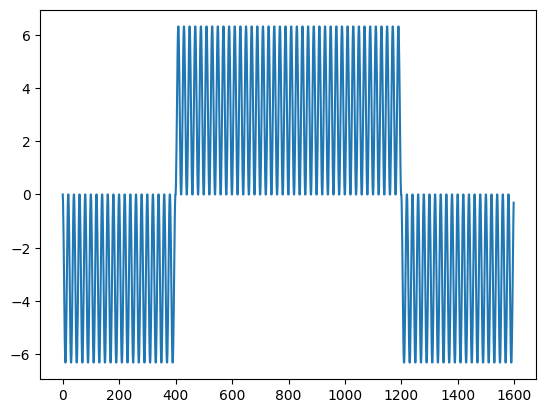

In [5]:
rx1=sig.correlate(x1,x1) #Autocorrelacion
rx2= sig.correlate(x1,x2)
rx3= sig.correlate(x1,x3)
rx4= sig.correlate(x1,x4)
rx5= sig.correlate(x1,x5)
rx6= sig.correlate(x1,x6)
plt.figure(8)
plt.plot( rx1)
plt.figure(9)
plt.plot( rx2)
plt.figure(10)
plt.plot( rx3)
plt.figure(11)
plt.plot( rx4)
plt.figure(12)
plt.plot( rx5)
plt.figure(13)
plt.plot( rx6)


Aca se resuelve la siguiente identidad trigonometrica
$$ 2 \cdot \sin(\alpha) \cdot \sin(\beta) \;=\; \cos(\alpha - \beta) - \cos(\alpha + \beta) $$


![Mi imagen](tps1.jpeg)



Por ultimo se grafico ambas señales trignometricas para demostrar que son iguales

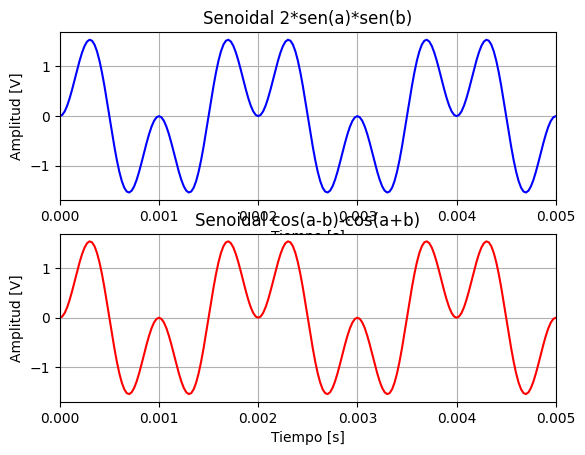

In [6]:
tt1,y1= sen(vmax= vmax1, dc = dc1, ff=1000, ph=0, nn=N, fs=fs1)
tt2,y2=sen(vmax= vmax1, dc = dc1, ff=500, ph=0, nn=N, fs=fs1)
y= 2*y1*y2
#a-b= 500Hz
#a+b= 1500Hz
tt3,y3=cos(vmax=vmax1,dc=dc1, ff=500, ph=0, nn=N, fs=fs1)
tt4,y4=cos(vmax=vmax1,dc=dc1, ff=1500, ph=0, nn=N, fs=fs1)
b=y3-y4
fig, axs = plt.subplots(2, 1)
axs[0].plot(tt1, y, color='blue')
axs[0].set_title('Senoidal 2*sen(a)*sen(b)')
axs[0].set_xlabel('Tiempo [s]')
axs[0].set_ylabel('Amplitud [V]')
axs[0].set_xlim(0, 0.005)
axs[0].grid(True)

axs[1].plot(tt3, b, color='red')
axs[1].set_title('Senoidal cos(a-b)-cos(a+b)')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [V]')
axs[1].set_xlim(0, 0.005)
axs[1].grid(True)

# Conclusiones 
Al realizar este trabajo se logro generar señales parametrizadas en amplitud, valor medio, frecuencia, fase, número de muestras y frecuencia de muestreo, con lo cual reforzó la importancia del teoerema muestreo y de la relación entre la frecuencia de la señal y la frecuencia de muestreo, y por ultimo se introdujeron conceptos de correlación y autocorrelación

# Autoevaluación del aprendizaje
Indicar una opción:

Resolví la tarea con seguridad

**Resolví la tarea, pero tengo dudas**

Resolví la tarea,pero no entendí bien

No pude resolverla y no entendí

Responder:

¿Qué aprendiste al hacer esta tarea?

Aprendi hacer las funciones que pedian que realice y como hacer las autocorrelacion, ortogonalidad y la correlacion cruzada

¿Qué te quedó claro? ¿Qué te sigue costando?

Las funciones, pero la del pulso no se si esta bien hecha y los graficos de la autocorrelacion y correlacion cruzada no se si estan bien. Algo que no entendi bien es cual es el uso de la autocorrelacion y correlacion cruzada
Indicar si se utilizó IA:

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.** 

No usé IA.

En caso afirmativo, indicar una opción o varias:

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

Conclusiones.
